In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
import matplotlib.font_manager as fm
path =  '/usr/share/fonts/opentype/noto/NotoSansCJK-Bold.ttc'
fontprop = fm.FontProperties(fname=path, size=18).get_name()

matplotlib.rc('font', family=fontprop)
matplotlib.rc('axes', unicode_minus = False)

In [3]:
df_titanic = pd.read_csv("/home/piai/바탕화면/빅데이터/2. Big Data 분석/titanic.csv", 
                encoding = 'euc-kr')
df_titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [4]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_titanic.shape

(891, 12)

In [6]:
df_titanic.describe()

PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.758889    0.523008   
std     257.353842    0.486592    0.836071   13.002570    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   30.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200

In [7]:
# df_titanic_data = df_titanic.DataFrame()
df_titanic.isnull()

PassengerId  Survived  Pclass   Name    Sex    Age  SibSp  Parch  Ticket  \
0          False     False   False  False  False  False  False  False   False   
1          False     False   False  False  False  False  False  False   False   
2          False     False   False  False  False  False  False  False   False   
3          False     False   False  False  False  False  False  False   False   
4          False     False   False  False  False  False  False  False   False   
..           ...       ...     ...    ...    ...    ...    ...    ...     ...   
886        False     False   False  False  False  False  False  False   False   
887        False     False   False  False  False  False  False  False   False   
888        False     False   False  False  False  False  False  False   False   
889        False     False   False  False  False  False  False  False   False   
890        False     False   False  False  False  False  False  False   False   

      Fare  Cabin  Embarked  
0    False   True     False  
1    False  False     False  
2    False   True     False  
3    False  False     False  
4    False   True     False  
..     ...    ...       ...  
886  False   True     False  
887  False  False     False  
888  False   True     False  
889  False  False     False  
890  False   True     False  

[891 rows x 12 columns]

In [8]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# df_titanic['Cabin'].fillna('Z')

In [10]:
df_titanic.to_excel("/home/piai/바탕화면/빅데이터/2. Big Data 분석/titanic.xlsx",
            encoding = 'euc-kr', index = False)

<AxesSubplot:>

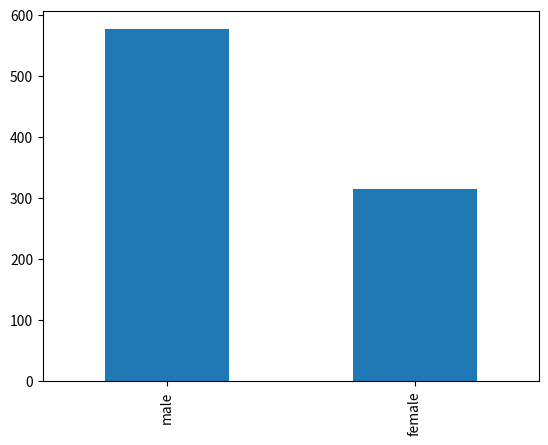

In [11]:
df_count = df_titanic["Sex"].value_counts()
df_count.plot.bar()
#  남녀 성별 구분 ~ 배에 남성이 더 많이 타고 있음

<AxesSubplot:xlabel='Sex,Survived'>

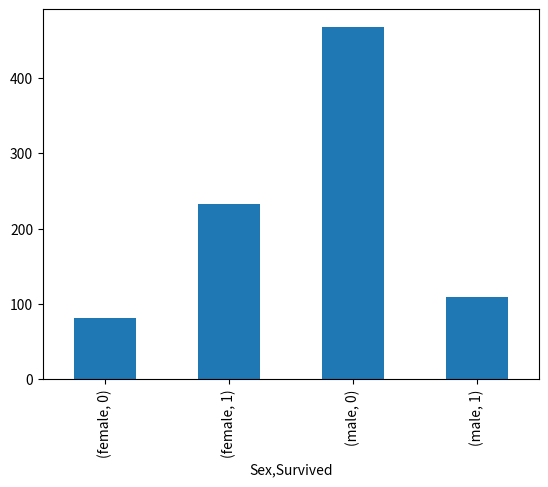

In [12]:
# groupby를 이용해서 표현 (성별 , 나이) ~ 생존률 확인
df_groupby_total = df_titanic.groupby(["Sex", "Survived"]).size()
#  sort 없이 size로 정렬 可能
df_groupby_total.plot.bar()
# 많은 인원이 탑승했다면 일반적으로 생존률도 비례해야한다고 생각하지만 
# ~ 정반대의 결과를 보여줌 ?????
#  가족단위의 구성원도 있는데 혼자와 가족구성 단위 중 어떤 단위가 더 높은 생존률을 보여줄까?
# ↓↓↓↓

In [13]:
df_titanic["Age"].describe()
# 나이 최소값 0.42 최대값 80 ~ 나머지 구간(old) 범위 지정에 사용

count    891.000000
mean      29.758889
std       13.002570
min        0.420000
25%       22.000000
50%       30.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [14]:
df_titanic['Age_bin'] = pd.cut(df_titanic['Age'], bins=[0, 14, 28, 45, 56, 100],
                            include_lowest = True,
                            labels = ['Child', 'Young', 'Middle', 'Prime', 'Old'])
# 14세 이하 child
# 28세 이하 young
# 45세 이하 middle
# 56세 이하 prime
# 나머지 old 로 구간값 재설정 ~ 아래 데이터 표의 Age_bin을 통해 확인가능

In [15]:
df_titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Age_bin  
0      0         A/5 21171   7.2500   NaN        S   Young  
1      0          PC 17599  71.2833   C85        C  Middle  
2      0  STON/O2. 3101282   7.9250   NaN        S   Young  
3      0            113803  53.1000  C123        S  Middle  
4      0            373450   8.0500   NaN        S  Middle

<AxesSubplot:xlabel='Family', ylabel='count'>

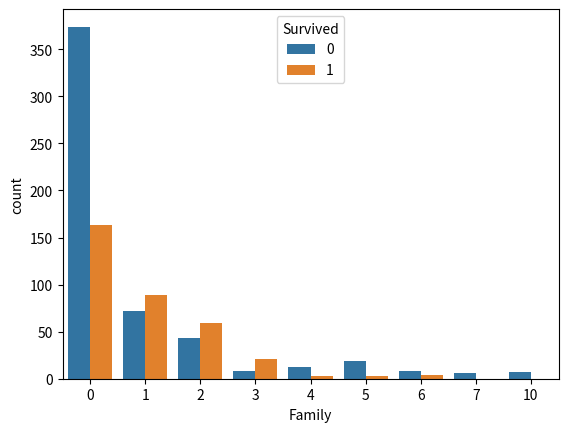

In [16]:
df_titanic['Family'] = df_titanic['SibSp'] + df_titanic['Parch']
sns.countplot(data = df_titanic, x='Family', hue='Survived')
# 가족이 없는 경우 사망률이 높음 
#  family의 1~2구간이 생존률이 다른 구간에 비해 비교적 높음

In [17]:
df_titanic["Fare"].describe()
#  요금 최소값 0 최대값 512.329 ~ 나머지 구간(4) 범위 지정에 사용

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [18]:
df_titanic['Fare_bin'] = pd.cut(df_titanic['Fare'], bins=[0, 50, 100, 150, 200, 600],
                            include_lowest = True,
                            labels = ['0', '1', '2', '3', '4'])
df_titanic.head()
# 요금
# 50 이하 0
# 100 이하 1
# 150 이하 2
# 200 이하 3
# 나머지 4 로 구간값 재설정 ~ 아래 데이터 표의 Fare_bin을 통해 확인가능
# df_titanic['fare_class'] = pd.cut(df_titanic.fare, 5)
#  만약 구간값이 정해져 있지 않고 그냥 5구간 나누라고 한다면 위와 같이 하고 라벨만 적당히 지정해준다

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked Age_bin  Family Fare_bin  
0      0         A/5 21171   7.2500   NaN        S   Young       1        0  
1      0          PC 17599  71.2833   C85        C  Middle       1        1  
2      0  STON/O2. 3101282   7.9250   NaN        S   Young       0        0  
3      0            113803  53.1000  C123        S  Middle       1        1  
4      0            373450   8.0500   NaN        S  Middle       0        0

In [19]:
# df_titanic_survived = df_titanic.groupby(["Family"])[]
# df_titanic_survived.plot.pie(y="Survived",autopct="%.1f%%")

# df.groupby(["Pclass", "Sex"])["Age"].describe() ~ 실패

/home/piai/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


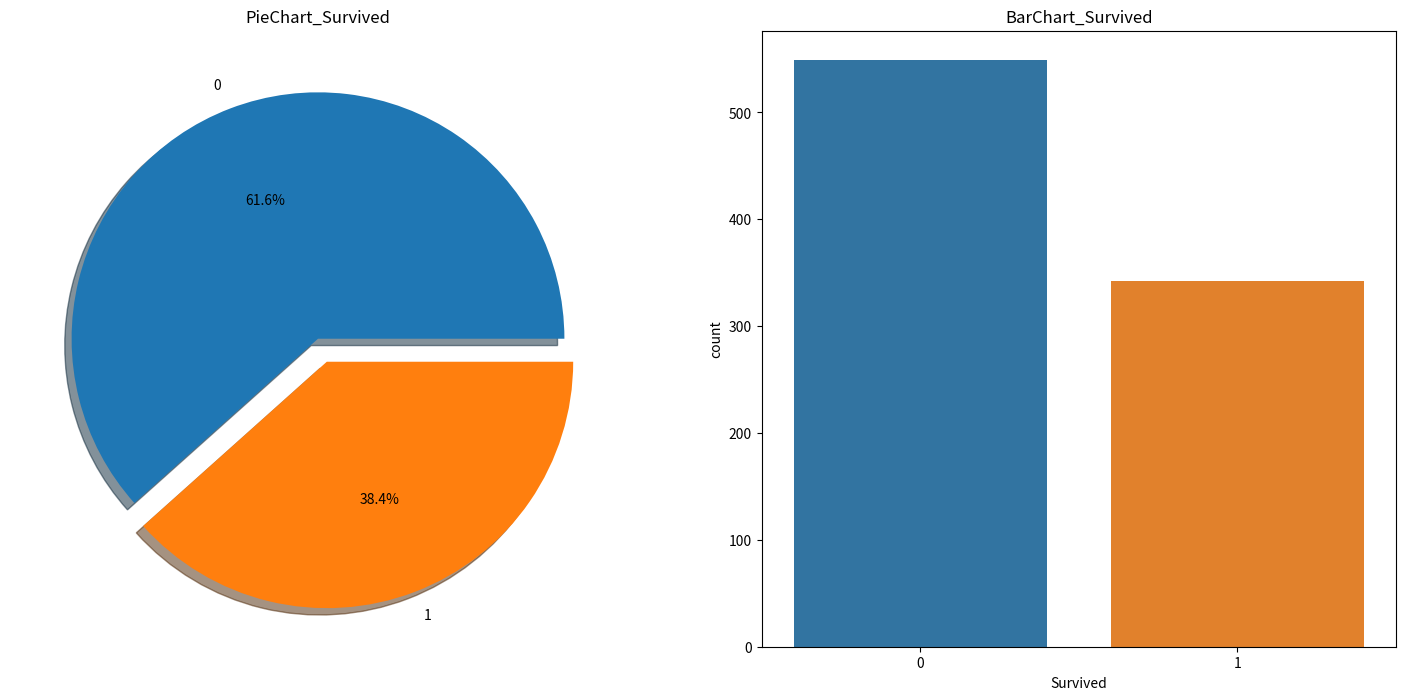

In [20]:
fig, ax = plt.subplots(1, 2, figsize=(18,8))
df_titanic['Survived'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
# explode ~ 파이조각 돌출 크기(0이면 x) - 2번째 파이조각 돌출
# autopct ~ 소수점 1자리까지 %로 표기
ax[0].set_title('PieChart_Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=df_titanic,ax=ax[1])
ax[1].set_title('BarChart_Survived')
plt.show()
# 생존률을 파이차트와 바차트로 수치를 확인한 결과 생존률 38.4%(1) 확인가능

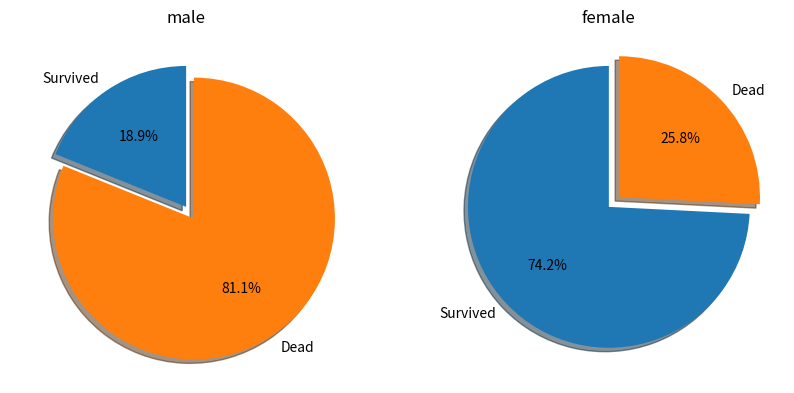

In [21]:
labels = 'Survived', 'Dead'
sizes_m = [len(df_titanic.loc[ (df_titanic["Sex"]=='male') & (df_titanic["Survived"]==1)]), \
         len(df_titanic.loc[ (df_titanic["Sex"]=='male')& (df_titanic["Survived"]==0)]) ]

sizes_f = [len(df_titanic.loc[ (df_titanic["Sex"]=='female') & (df_titanic["Survived"]==1)]), \
         len(df_titanic.loc[ (df_titanic["Sex"]=='female')& (df_titanic["Survived"]==0)]) ]

explode = (0, 0.1)

fig = plt.figure()
fig.set_size_inches(10,5)
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.pie(sizes_m, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('male')

ax2.pie(sizes_f, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.set_title('female')

plt.show()
#  남성 여성으로 구분했을 때 남성에 비해 여성의 생존률이 높다

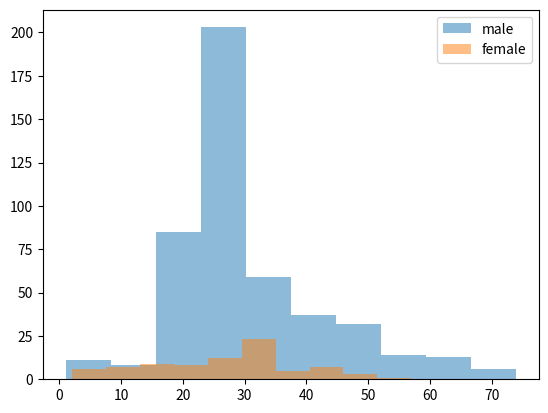

In [22]:
#  그렇다면 남성의 연령대별 사망 분포를 확인해보자
plt.hist(df_titanic.loc[(df_titanic["Sex"]=="male")&(df_titanic["Survived"]==0)]["Age"],label="male",alpha=0.5)
plt.hist(df_titanic.loc[(df_titanic["Sex"]=="female")&(df_titanic["Survived"]==0)]["Age"],label="female",alpha=0.5)
plt.legend()
# 10대 중반에서 30대 중반까지 가장 높은 인원이 사망

/home/piai/anaconda3/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/piai/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


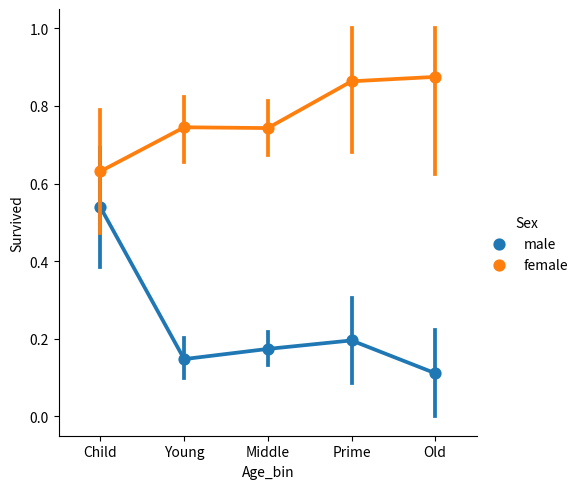

In [23]:
sns.factorplot('Age_bin', 'Survived', hue='Sex', data=df_titanic)
#  그렇다면 연령대별 남성 여성 생존율 비교 (확률)

In [24]:
df_titanic[['Sex','Age_bin','Survived']].groupby(['Sex', 'Age_bin']).mean()

Survived
Sex    Age_bin          
female Child    0.631579
       Young    0.745098
       Middle   0.743056
       Prime    0.863636
       Old      0.875000
male   Child    0.538462
       Young    0.147541
       Middle   0.173759
       Prime    0.195652
       Old      0.111111

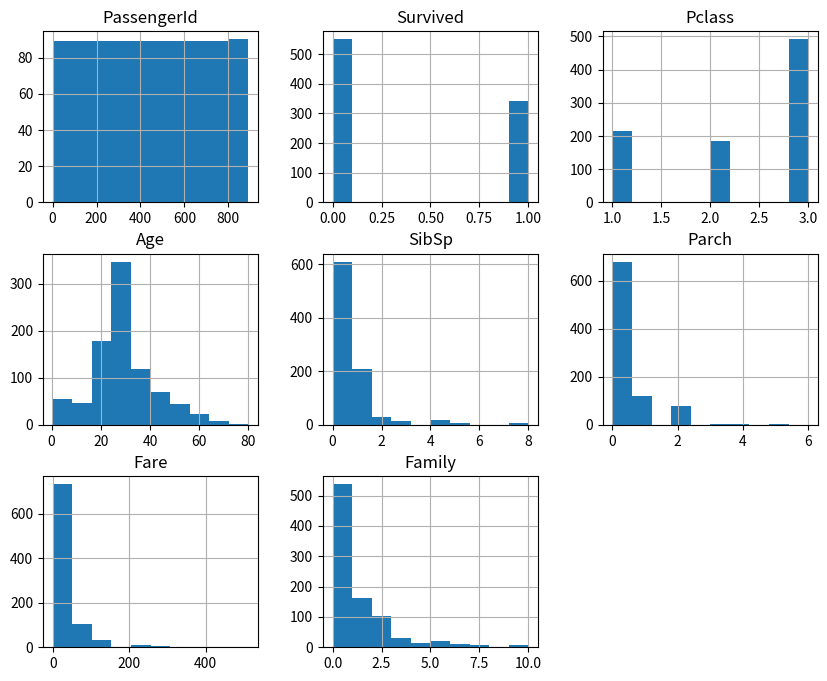

In [25]:
df_titanic.hist(figsize=(10,8));
#  수치형 데이터 히스토그램으로 생성

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

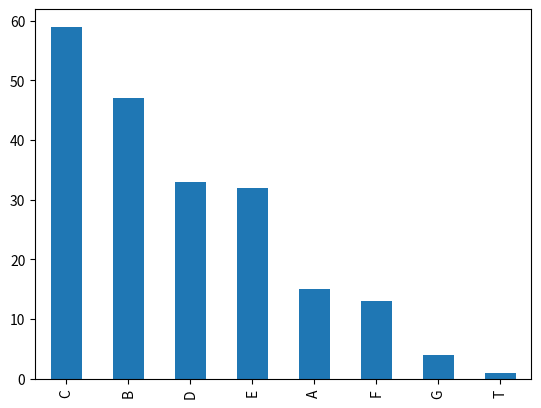

In [26]:
df_count_Cabin = df_titanic["Cabin"].str.get(i=0).value_counts()
df_count_Cabin.plot.bar()
df_count_Cabin
# #   객실 구분 c cabin가 많고 t cabin가 가장 적다 ~

/home/piai/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


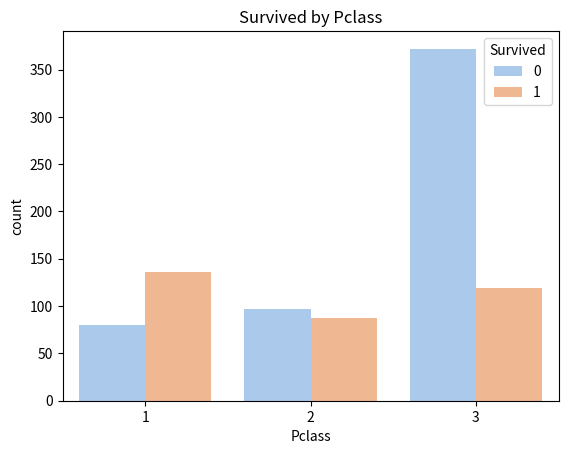

In [29]:
df_titanic_pclass = sns.countplot(
    'Pclass',
    hue='Survived', # 색깔에 따른 비교(survived)
    palette='pastel', # 색상 (파스텔 톤)
    data=df_titanic
)
plt.title('Survived by Pclass')
plt.show()

In [40]:
# df_titanic["Survived"].value_counts().plot.pie( explode=[0,0.1], 
#                                              autopct='%1.1f%%',
#                                               ax=df_titanic_pclass)
# # # explode ~ 파이조각 돌출 크기(0이면 x) - 2번째 파이조각 돌출
# # # autopct ~ 소수점 1자리까지 %로 표기
# # # set_title('PieChart_Survived')
# # # set_ylabel('')
# # sns.countplot('Survived',data=df_titanic)
# plt.show() ~ 실패

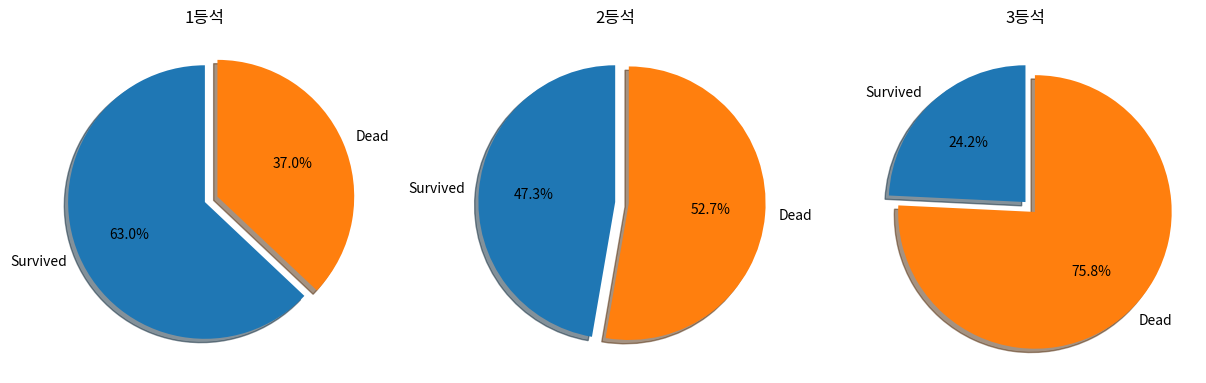

In [43]:
labels = 'Survived', 'Dead'
sizes_1 = [len(df_titanic.loc[ (df_titanic["Pclass"]==1) & (df_titanic["Survived"]==1)]), \
         len(df_titanic.loc[ (df_titanic["Pclass"]==1)& (df_titanic["Survived"]==0)]) ]

sizes_2 = [len(df_titanic.loc[ (df_titanic["Pclass"]==2) & (df_titanic["Survived"]==1)]), \
         len(df_titanic.loc[ (df_titanic["Pclass"]==2)& (df_titanic["Survived"]==0)]) ]

sizes_3 = [len(df_titanic.loc[ (df_titanic["Pclass"]==3) & (df_titanic["Survived"]==1)]), \
         len(df_titanic.loc[ (df_titanic["Pclass"]==3)& (df_titanic["Survived"]==0)]) ]

explode = (0, 0.1) 

fig = plt.figure()
fig.set_size_inches(15,5)
ax1 = fig.add_subplot(1,3,1)
ax2 = fig.add_subplot(1,3,2)
ax3 = fig.add_subplot(1,3,3)

ax1.pie(sizes_1, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.set_title('1등석')

ax2.pie(sizes_2, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax2.set_title('2등석')

ax3.pie(sizes_3, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax3.set_title('3등석')

plt.show()

In [50]:
# df_titanic[['Pclass', 'Sex', 'Survived']].groupby(['Pclass', 'Sex']).mean() ~ 실패


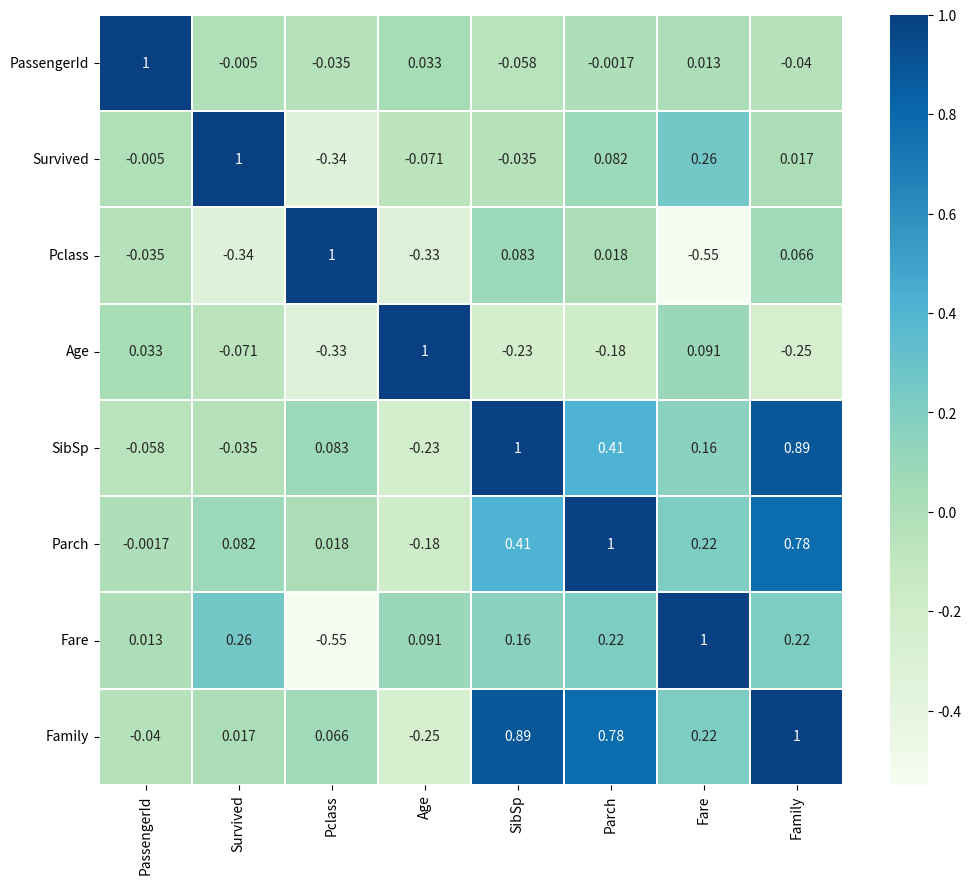

In [52]:
sns.heatmap(df_titanic.corr(),annot=True,cmap='GnBu',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(12,10)
plt.show()

In [66]:
# sns.histplot(data = df_titanic, x="Age_bin", kde=True, stat = "percent", hue = "Sex")
# # count', 'frequency', 'density', 'probability', 'proportion', 'percent' ~ 원하는 데이터 값 아님

In [ ]:
#  결론
# Sex 남여간 생존 확률 차이가 존재한다. 하지만 많다고 생존률이 높지는 않다.
# 혼자 보다 가족이 있는 경우에 생존 확률이 높다
# class가 높으면 생존률이 높다
# Age(child)이 생존 확률이 높다. 다른 나이 구간대에 비해 가장 값이 가깝다.

# 자동차 연비 기술통계치 구하기

In [ ]:
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

In [ ]:
ds_mycars = pd.read_csv("/home/piai/바탕화면/빅데이터/1 Big Data 분석 기초/mycars.csv")
ds_mycars.head()

In [ ]:
ds_mycars.info()
#  myscars.csv에 대한 요약 정보 확인 ~ column 확인

In [ ]:
df = ds_mycars[['automatic', 'mpg']]
df.groupby('automatic').describe()
# 시내에서 연비(mpg) : 구동 방식별(auto, manual)

In [ ]:
df = ds_mycars[['automatic', 'highway_mileage']]
df.groupby('automatic').describe()
#  고속도로에서 연비(mpg) : 구동방식별(auto, manual)

In [ ]:
# 범주형 변수인 구동방식, 모델에 대해 계산
ds_mycars = pd.read_csv("/home/piai/바탕화면/빅데이터/1 Big Data 분석 기초/mycars.csv")
ds_mycars.head()

In [ ]:
df_2 = ds_mycars[['model', 'automatic']]
# model automatic을 column으로 설정해서 데이터 추출

In [ ]:
count = df_2[['model','automatic']].value_counts().sort_index()
cumcnt = np.cumsum(count)
percent = count/sum(count)*100
cumpct = np.cumsum(percent)

In [ ]:
count_data = pd.DataFrame({'Count': count, 'CumCnt': cumcnt, 'Percent': percent, 'CumPct':cumpct})
count_data.columns.name
count_data
#  model별 구동방식 구분하여 count cumcnt percent cumpct 데이터 표현

# 정규분포

In [ ]:
# 정규분포 ~
#  대한민국 남성의 20~30대 키를 측정한 결과, 평균 175(mu) 표준편차 5(sigma) 일때 
#  나의 키가 180일 경우 나는 몇 % 범위에 위치? (단위 : cm)

In [ ]:
height_mu = 175
sigma = 5
height_x = 180
prob = stats.norm.cdf(height_x, height_mu, sigma)
print("나의 키가 {0}cm 일 경우에 나는 {1:.1f}% 범위에 위치" .format(height_x,(1-prob)*100))
# 

In [ ]:
km_mu = 12
sigma = 3
km_x1 = 9
km_x2 = 15
prob2 = stats.norm.cdf(km_x2, km_mu, sigma)
prob1 = stats.norm.cdf(km_x1, km_mu, sigma)

print("{0}km 이상 {1}km 이하를 달리는 확률은{2:.3f}에 해당함" .format(km_x1, km_x2,(prob2-prob1)))
#  9이상 15이하 달릴 확률
#  15까지 확률에서 9밑의 확률을 빼주는 방법을 사용

In [ ]:
prob3 = stats.norm.cdf(km_x2, km_mu, sigma)
print("{0}km 이상 달리는 확률은{1:.3f}에 해당함" .format(x,(1-prob3)))
#  15이상 달릴 확률
#  15까지 확률을 구함, 그다음 전체확률(1)에서 15까지 확률을 빼주는 방법을 사용

# t분포

In [ ]:
# 확률변수 t는 자유도 100인 t분포 따름
# t값이 2.0일 때 P(T<=t) ?
t=2.0
df=100
prob = stats.t.cdf(t,df)
print("P(T<=F): {:.3f}".format(prob))
# 표본 101개를 추출했을 때, 누적확률 값은 0.976 이다

# x^2

In [ ]:
# 확률변수 x^2는 자유도가 8인 x^2 분포를 따름
# x^2값이 3.0일 때, P(X<=x^2) ?
chisq = 3.0
df = 8
prob = stats.chi2.cdf(chisq, df)
print("P(X<={0}) : {1:.4f}" .format(chisq, prob))
#  표본이 9개를 추출했을 떄, 확률 값은 0.0656 이다

# F분포

In [ ]:
# 확률변수 F는 각각 자유도 10, 100인 F분포를 따른다
# F값이 1.5일 때 P(X<=F) ?
f =1.5
dfnum =10
dfden =100

prob = stats.f.cdf(x=f, dfn = dfnum, dfd = dfden)
print("P(X<=F): {:.3}" .format(prob))
#  두 집단의 표본집단 분산을 비교 '1'에 가까우면 비슷함
#  ex) 공장의 경우, 공정이 비슷하다고 판단